# Implementation of MCP Neuron for AND and OR Function.

In [ ]:
def MCP_Neurons_AND(X1, X2, T):
  """
  This functions implements basic AND operations with MCP Neuron for two inputs.
  Arguments:
  Inputs:
  X1 (1 nd array): An array of binary values.
  X2 (1 nd array): An array of binary values.
  Output:
  state_neuron(1D-list): An state of neuron 1 0r 0 for the particular inputs.
  """
  assert len(X1) == len(X2)
  sum = [X1 + X2 for X1,X2 in zip(X1,X2)]
  state_neuron =[1 if z>= T else 0 for z in sum]
  ### YOUR CODE HERE ###
  # Perform an element wise addition of two input arrays stored in a new array(list):
  # Create a new array to put all the prediction let's name that a state_neuron.
  # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.

  return state_neuron

In [ ]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [ ]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)
    state_neuron = []
    for x1, x2 in zip(X1, X2):
        if (x1 + x2) >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)
    ### YOUR CODE HERE ###
    # Perform an element wise addition of two input arrays stored in a new array(list):
    # Create a new array to put all the prediction let's name that a state_neuron.
    # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.

    return state_neuron


In [ ]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


List out all the limitations of MCP - Neurons.

Weight and threshold are fixed.

It can only solve linearly separable data.

It fails in problem like XOR.

Think if you can develop a logic to solve for XOR function using MCP Neuron.
{Can you devise a if else rules.}

if X1==X2:
output=0
else:
output=1

# Implementation for 0 Vs. 1 Classification.

## Step 1: Load the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_1 = pd.read_csv("mnist_0_and_1.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


What does the shape of X represent?

X represent the pixel of image.

What does the shape of Y represent?

Y represent class label of image(0,1)

### Viewing the Dataset.

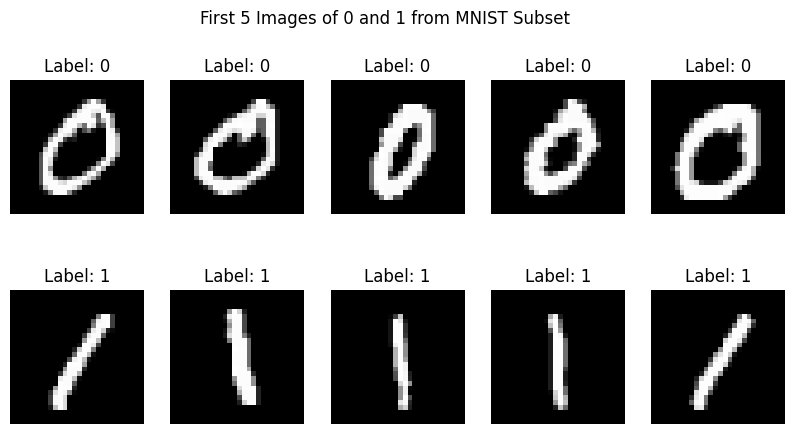

In [ ]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [ ]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

What does the weights array represent in this context?

The weights array serves as the trainable parameter in this context.


Why are we initializing the weights to zero? What effect could this have on the training process?

Initializing the weights to zero provides a neutral starting point, but in multi-layer neural networks, it may cause issues during training.


## Step - 3 - Make a Decision function:

In [ ]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    y_pred_all = np.where(predictions >= 0, 1, 0)
    #####Your Code Here############  # Activation function (step function)
    return y_pred_all

## Step - 3 - Implement the Perceptron Learning Algorithm

In [ ]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Step 3: Perceptron Learning Algorithm
    # Your Code here#
    n_samples = X.shape[0]

    for epoch in range(epochs):
        correct_predictions = 0
        for i in range(n_samples):
            linear_output = np.dot(X[i], weights) + bias
            y_pred = 1 if linear_output >= 0 else 0
            if y_pred != y[i]:
                update = learning_rate * (y[i] - y_pred)
                weights += update * X[i]
                bias += update
            else:
                correct_predictions += 1
        accuracy = correct_predictions / n_samples

        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch + 1}/{epochs} - Accuracy: {accuracy:.4f}")


    return weights, bias, accuracy

What is the purpose of the output = np.dot(X[i], weights) + bias line?

This line calculates the weighted sum of input features and adds the bias term.

What happens when the prediction is wrong? How are the weights and bias updated?

When the prediction is incorrect, the weights and bias are adjusted using the Perceptron Learning Rule.

Why is the final accuracy important, and what do you expect it to be?

The final accuracy is crucial as it reflects the model's performance on new data, and I think it to be close to 1.

## Training the Perceptron

In [ ]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 1/100 - Accuracy: 0.9967
Epoch 11/100 - Accuracy: 0.9995
Epoch 21/100 - Accuracy: 1.0000
Epoch 31/100 - Accuracy: 1.0000
Epoch 41/100 - Accuracy: 1.0000
Epoch 51/100 - Accuracy: 1.0000
Epoch 61/100 - Accuracy: 1.0000
Epoch 71/100 - Accuracy: 1.0000
Epoch 81/100 - Accuracy: 1.0000
Epoch 91/100 - Accuracy: 1.0000
Epoch 100/100 - Accuracy: 1.0000
The Final Accuracy is:  1.0


## Step 5: Visualize Misclassified Images

In [ ]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Final Accuracy: 1.0000
All images were correctly classified!


What does misclassified idx store, and how is it used in this code?

It stores the indices of misclassified samples from the validation set.

How do you interpret the result if the output is ”All images were correctly classified!”?

If misclassified idx is empty, it means all predictions were correct, resulting in the output: "All images were correctly classified!"

In [ ]:
df1 = pd.read_csv("mnist_3_and_5.csv")  # Add the correct file path if necessary

# Extract features and labels
X1 = df1.drop(columns=["label"]).values  # 784 pixels
y1 = df1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X1.shape)
print("Label vector shape:", y1.shape)

Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


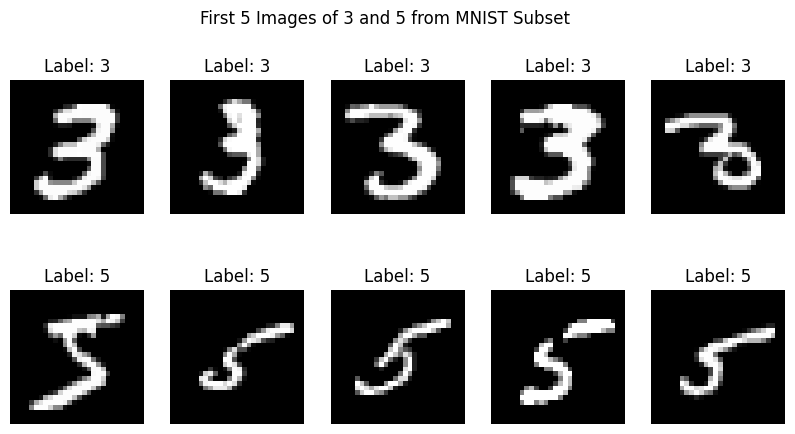

In [ ]:
# Separate images for label 0 and label 1
images_0 = X1[y1 == 3]  # Get all images with label 0
images_1 = X1[y1 == 5]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 4 or len(images_1) < 4:
    print("Error: Not enough images in images_0 or images_1 to plot 4 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 3")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 5")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 3 and 5 from MNIST Subset")
    plt.show()

In [ ]:
weights = np.zeros(X1.shape[1])
bias = 0
learning_rate = 0.1
epochs = 100

In [ ]:
def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    y_pred_prob = 1 / (1 + np.exp(-predictions))
    y_pred_all = np.where(y_pred_prob >= 0.5, 1, 0)
    #####Your Code Here############  # Activation function (step function)
    return y_pred_all

In [ ]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Step 3: Perceptron Learning Algorithm
    # Your Code here#
    n_samples = X.shape[0]

    for epoch in range(epochs):
        correct_predictions = 0

        # Iterate through each sample in the dataset
        for i in range(n_samples):
            # Compute the linear output (prediction before activation)
            linear_output = np.dot(X[i], weights) + bias
            # Activation function (step function for Perceptron)
            y_pred = 1 if linear_output >= 0 else 0

            # If the prediction is incorrect, update the weights and bias
            if y_pred != y[i]:
                # Perceptron update rule
                update = learning_rate * (y[i] - y_pred)
                weights += update * X[i]
                bias += update
            else:
                correct_predictions += 1

        # Calculate accuracy after each epoch
        accuracy = correct_predictions / n_samples

        # Print accuracy every 10 epochs or at the final epoch
        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch + 1}/{epochs} - Accuracy: {accuracy:.4f}")


    return weights, bias, accuracy

In [ ]:
weights, bias, accuracy = train_perceptron(X1, y1, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 1/100 - Accuracy: 0.0000
Epoch 11/100 - Accuracy: 0.0000
Epoch 21/100 - Accuracy: 0.0000
Epoch 31/100 - Accuracy: 0.0000
Epoch 41/100 - Accuracy: 0.0000
Epoch 51/100 - Accuracy: 0.0000
Epoch 61/100 - Accuracy: 0.0000
Epoch 71/100 - Accuracy: 0.0000
Epoch 81/100 - Accuracy: 0.0000
Epoch 91/100 - Accuracy: 0.0000
Epoch 100/100 - Accuracy: 0.0000
The Final Accuracy is:  0.0


Final Accuracy: 0.0000


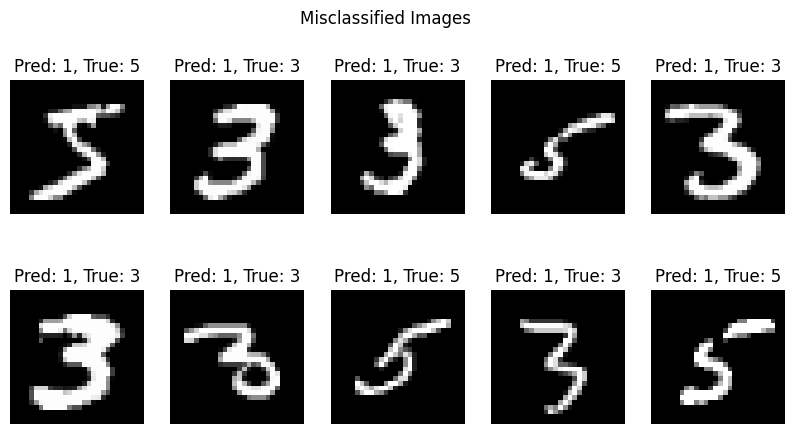

In [ ]:
# Get predictions for all data points
predictions = np.dot(X1, weights) + bias
y_pred_prob = 1 / (1 + np.exp(-predictions))
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y1)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y1[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

For the non binary data the classification is completely wrong.